# Import datajoint module and ibl pipeline modules

In [1]:
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data

Connecting ibl_demo@datajoint.internationalbrainlab.org:3306


# ERD

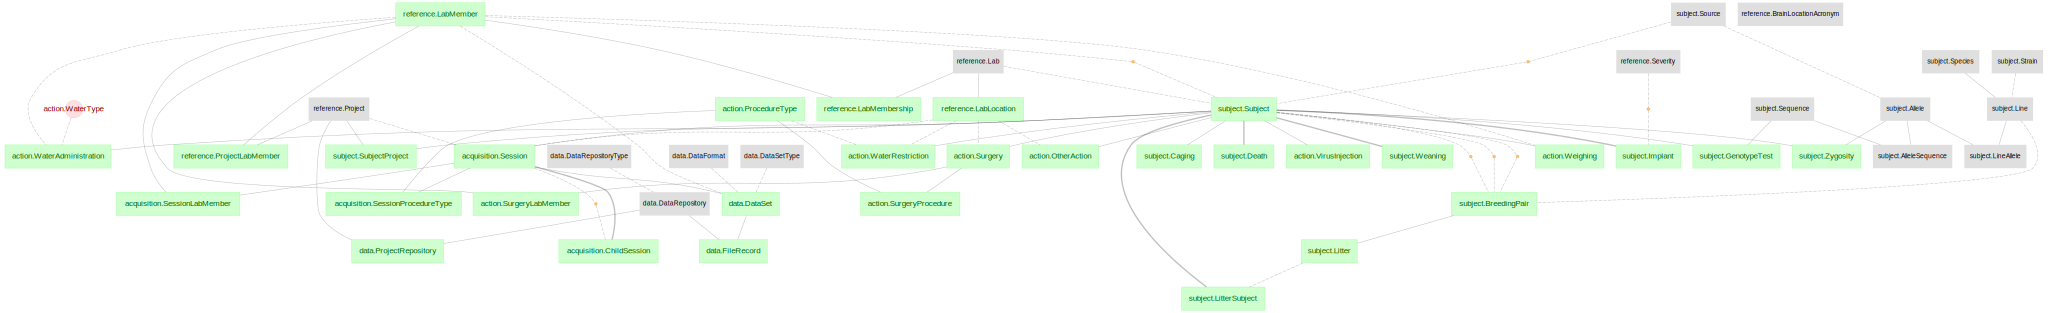

In [2]:
dj.ERD(subject.schema) + dj.ERD(reference.schema) + dj.ERD(action.schema) + dj.ERD(acquisition.schema) + dj.ERD(data.schema)

# Query example- subject.Subject

## All subjects

In [3]:
subject.Subject()

subject_uuid,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_source name of source,lab_name name of lab,responsible_user username,protocol_number protocol number,subject_description
0026c82d-39e4-4c6b-acb3-303eb4b24f05,IBL_32,M,2018-04-23,None,None,None,valeria,1,None
0124f697-16ce-4f59-b87c-e53fcb3a27ac,6867,M,2018-06-25,None,None,None,ines,1,None
034c07c5-69b0-48c7-ab3e-e491e4dbb725,IBL_25,M,2018-04-23,None,None,None,valeria,1,None
037d8473-8309-4d7a-96fb-f943be8e8df3,ZM_328,M,2018-08-07,LF,None,None,ines,3,None
03956b1f-6836-4c5f-9dea-b57b5292b177,6870,M,2018-06-25,None,None,None,ines,1,None
05821271-3125-48dc-855b-4165900622af,6814,M,2018-06-17,None,None,None,ines,3,None
062cf8a2-96db-4766-9ff3-eb52bf56fff8,6513,M,2018-04-20,None,None,None,ines,1,None


## Subjects born after a certain date

In [4]:
subject.Subject() & 'subject_birth_date > "2017-08-23"'

subject_uuid,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_source name of source,lab_name name of lab,responsible_user username,protocol_number protocol number,subject_description
0026c82d-39e4-4c6b-acb3-303eb4b24f05,IBL_32,M,2018-04-23,None,None,None,valeria,1,None
0124f697-16ce-4f59-b87c-e53fcb3a27ac,6867,M,2018-06-25,None,None,None,ines,1,None
034c07c5-69b0-48c7-ab3e-e491e4dbb725,IBL_25,M,2018-04-23,None,None,None,valeria,1,None
037d8473-8309-4d7a-96fb-f943be8e8df3,ZM_328,M,2018-08-07,LF,None,None,ines,3,None
03956b1f-6836-4c5f-9dea-b57b5292b177,6870,M,2018-06-25,None,None,None,ines,1,None
05821271-3125-48dc-855b-4165900622af,6814,M,2018-06-17,None,None,None,ines,3,None
062cf8a2-96db-4766-9ff3-eb52bf56fff8,6513,M,2018-04-20,None,None,None,ines,1,None


## Subjects that has been genotyped

In [5]:
subject.Subject() & subject.GenotypeTest()

subject_uuid,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_source name of source,lab_name name of lab,responsible_user username,protocol_number protocol number,subject_description
8e181135-7106-43c1-9cda-d854856e6d95,LEW009,M,2018-05-01,TL,Cruciform BSU,None,lauren,1,None
9540b01b-fa1e-4d1e-872b-0b4ccaae3888,LEW010,F,2018-05-01,TL,Cruciform BSU,None,lauren,1,None
c68cf5d5-e75a-46f1-8eda-a2db78cf4743,ALK081,F,2018-04-13,ML,None,None,armin,3,None
faf159e2-1f4e-4477-8079-1a55fe5386a9,LEW008,M,2018-05-01,TR,Cruciform BSU,None,lauren,3,MISSING END OF TAIL


## Subjects that has not been genotyped

In [6]:
subject.Subject() - subject.GenotypeTest()

subject_uuid,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_source name of source,lab_name name of lab,responsible_user username,protocol_number protocol number,subject_description
0026c82d-39e4-4c6b-acb3-303eb4b24f05,IBL_32,M,2018-04-23,None,None,None,valeria,1,None
0124f697-16ce-4f59-b87c-e53fcb3a27ac,6867,M,2018-06-25,None,None,None,ines,1,None
034c07c5-69b0-48c7-ab3e-e491e4dbb725,IBL_25,M,2018-04-23,None,None,None,valeria,1,None
037d8473-8309-4d7a-96fb-f943be8e8df3,ZM_328,M,2018-08-07,LF,None,None,ines,3,None
03956b1f-6836-4c5f-9dea-b57b5292b177,6870,M,2018-06-25,None,None,None,ines,1,None
05821271-3125-48dc-855b-4165900622af,6814,M,2018-06-17,None,None,None,ines,3,None
062cf8a2-96db-4766-9ff3-eb52bf56fff8,6513,M,2018-04-20,None,None,None,ines,1,None


# Query example - reference.LabMember

## All lab members

In [7]:
reference.LabMember()

user_name username,user_uuid,password password,email email address,last_login last login,first_name first name,last_name last name,date_joined date joined,is_active active,is_staff staff status,is_superuser superuser status,is_stock_manager stock manager status,groups,user_permissions
anneu,5d38cdd5-36c4-44c7-ac74-3e6527073dbc,pbkdf2_sha256$120000$WP3tOyTgX8of$GEg3riJPOWfXGVHMHBHMSaZ5JyecI/gk17JEqLTk260=,anne.urai@gmail.com,2018-10-24 21:58:25,Anne,None,2018-09-19 14:05:28,1,1,0,0,=BLOB=,=BLOB=
armin,3397b57b-e19d-4f1f-9fd2-6bee1fdd46ef,pbkdf2_sha256$100000$yUZml7ZAUOeS$11SvAZCC8vAsSuyBo1AAMJQE+Aw1TmoQWDHEaUeWryk=,None,2018-09-07 15:24:53,None,None,2017-03-01 14:09:04,1,1,0,0,=BLOB=,=BLOB=
charu,4ebf837f-382f-493a-b76f-ba8b97d7172e,pbkdf2_sha256$100000$LFijTyxE8vpt$FjcIbApaAp/o4mRYyLYqzQBAB0FUNVZzJt4noDm6TPs=,None,2018-08-28 13:32:54,None,None,2017-02-22 14:35:44,1,1,1,1,=BLOB=,=BLOB=
chrisk,7339a9d0-b54c-4575-89e2-68adb92b7246,pbkdf2_sha256$120000$XzYTK0XHOiGs$iIJKyI2uG6FBjGOPKyLDyXrkR5y63eFJ6rwyysyVqeE=,None,None,None,None,2018-10-25 08:51:06,1,1,0,0,=BLOB=,=BLOB=
cyrille,61ec9f55-0805-4b21-a813-32de976dc0a9,pbkdf2_sha256$100000$XQUDxTs5TbK4$z75dagSCVaWs9uYORinfl73G47EGFfO+ej7IdXGVAEg=,None,2018-09-12 15:00:49,None,None,2017-02-15 13:52:41,1,1,1,0,=BLOB=,=BLOB=
dep,50ef0f6d-f29a-4735-aeee-e96dca901493,pbkdf2_sha256$120000$AxTxdIHvt0OO$lW6NxRKO83SGAUxwp1RhyMRYuUsTBe45kgZantAVIgw=,None,None,None,None,2018-09-25 11:33:23,1,1,0,0,=BLOB=,=BLOB=
Gaelle,6b8a9f6d-053d-45b6-ae04-06a90804cdfc,pbkdf2_sha256$120000$xH9NrW9T4GfE$ZuSpyZuIcu90A3vPT8g7d6v20ja6hVI8RuyCDNeVFPU=,None,2018-10-28 12:38:51,None,None,2018-09-04 19:15:20,1,1,0,0,=BLOB=,=BLOB=


## Query lab members in a particular lab through a membership table LabMembership

In [8]:
(reference.LabMember() * reference.LabMembership()) & 'lab_name="cortexlab"'

user_name username,lab_name name of lab,user_uuid,password password,email email address,last_login last login,first_name first name,last_name last name,date_joined date joined,is_active active,is_staff staff status,is_superuser superuser status,is_stock_manager stock manager status,groups,user_permissions,lab_membership_uuid,role,mem_start_date,mem_end_date
armin,cortexlab,3397b57b-e19d-4f1f-9fd2-6bee1fdd46ef,pbkdf2_sha256$100000$yUZml7ZAUOeS$11SvAZCC8vAsSuyBo1AAMJQE+Aw1TmoQWDHEaUeWryk=,None,2018-09-07 15:24:53,None,None,2017-03-01 14:09:04,1,1,0,0,=BLOB=,=BLOB=,3ed9fbf4-8ac6-47cb-9530-332b202813f8,None,None,None
charu,cortexlab,4ebf837f-382f-493a-b76f-ba8b97d7172e,pbkdf2_sha256$100000$LFijTyxE8vpt$FjcIbApaAp/o4mRYyLYqzQBAB0FUNVZzJt4noDm6TPs=,None,2018-08-28 13:32:54,None,None,2017-02-22 14:35:44,1,1,1,1,=BLOB=,=BLOB=,db3cc203-e3a5-4299-ae22-a7c878fd1a24,None,None,None
cyrille,cortexlab,61ec9f55-0805-4b21-a813-32de976dc0a9,pbkdf2_sha256$100000$XQUDxTs5TbK4$z75dagSCVaWs9uYORinfl73G47EGFfO+ej7IdXGVAEg=,None,2018-09-12 15:00:49,None,None,2017-02-15 13:52:41,1,1,1,0,=BLOB=,=BLOB=,aa872ac8-cdc4-4831-91e6-b3e38deffdf5,None,None,None
Gaelle,cortexlab,6b8a9f6d-053d-45b6-ae04-06a90804cdfc,pbkdf2_sha256$120000$xH9NrW9T4GfE$ZuSpyZuIcu90A3vPT8g7d6v20ja6hVI8RuyCDNeVFPU=,None,2018-10-28 12:38:51,None,None,2018-09-04 19:15:20,1,1,0,0,=BLOB=,=BLOB=,50f7063c-05d6-4127-aab4-bb3eb0b2e262,None,None,None
kenneth,cortexlab,abac951e-9062-407c-b952-dbf5269ed0a0,pbkdf2_sha256$120000$bhXBnUapZxFN$LtYJPc/kEzjL23UBjbiaCQJ/22UDeaJ922BHHfC3vb4=,None,2018-10-06 14:06:16,None,None,2017-03-01 14:10:40,1,1,0,0,=BLOB=,=BLOB=,e4de262c-1d76-4497-aae3-1fa0bfa9b4a4,None,None,None
lauren,cortexlab,12ddc89e-1f24-4324-a197-4ea72135a19a,pbkdf2_sha256$100000$msxYSL9wnHHz$vKQC64YaMvJ4gtI1FQGOQmNqJCJdjzIOQejsiyFfMTE=,None,2018-09-06 14:25:35,None,None,2017-05-08 19:57:09,1,1,0,0,=BLOB=,=BLOB=,d2d0a019-a948-499b-a54b-9eeefa88d8b0,None,None,None
miles,cortexlab,bd2cd700-d1c9-41db-bceb-7657345297cc,pbkdf2_sha256$120000$omBPoFO9PzXo$k3vWmkV0WI84bHAL6+fBCtxE1U76E190znrPtp/llOI=,None,2018-10-16 10:22:20,None,None,2017-03-01 14:08:26,1,1,1,0,=BLOB=,=BLOB=,f2401a36-f5d1-4a53-98d5-338f30a47eba,None,None,None
